# **Geometric map: Population & Data by province of Vietnam**

In [ ]:
import shapefile
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.colors import Normalize
from numpy import *
from mpl_toolkits.basemap import Basemap
from netCDF4 import *

In [ ]:
# Open the shapefile using the pyshp library
sf = shapefile.Reader("gadm41_VNM_shp/gadm41_VNM_1.shp")

records = sf.records()

print ((records[0:2]))

province_names = [record[4] for record in records]

print (province_names)

[Record #0: ['VNM.1_1', 'VNM', 'Vietnam', 'An Giang', 'An Giang', 'NA', 'Tỉnh', 'Province', 'NA', 'VN.AG', 'VN-44'], Record #1: ['VNM.7_1', 'VNM', 'Vietnam', 'Bà Rịa - Vũng Tàu', 'Ba Ria - Vung Tau', 'NA', 'Tỉnh', 'Province', 'NA', 'VN.BV', 'NA']]
['An Giang', 'Ba Ria - Vung Tau', 'Bac Giang', 'Bac Kan', 'Bac Lieu', 'Bac Ninh', 'Ben Tre', 'Binh Dinh', 'Binh Duong', 'Binh Phuoc', 'Binh Thuan', 'Ca Mau', 'Can Tho', 'Cao Bang', 'Da Nang', 'Dak Lak', 'Dak Nong', 'Dien Bien', 'Dong Nai', 'Dong Thap', 'Gia Lai', 'Ha Giang', 'Ha Nam', 'Ha Noi', 'Ha Tinh', 'Hai Duong', 'Hai Phong', 'Hau Giang', 'Ho Chi Minh', 'Hoa Binh', 'Hung Yen', 'Khanh Hoa', 'Kien Giang', 'Kon Tum', 'Lai Chau', 'Lam Dong', 'Lang Son', 'Lao Cai', 'Long An', 'Nam Dinh', 'Nghe An', 'Ninh Binh', 'Ninh Thuan', 'Phu Tho', 'Phu Yen', 'Quang Binh', 'Quang Nam', 'Quang Ngai', 'Quang Ninh', 'Quang Tri', 'Soc Trang', 'Son La', 'Tay Ninh', 'Thai Binh', 'Thai Nguyen', 'Thanh Hoa', 'Thua Thien Hue', 'Tien Giang', 'Tra Vinh', 'Tuyen Quan

## Exercise 1:
Plot the population of Vietnam by province

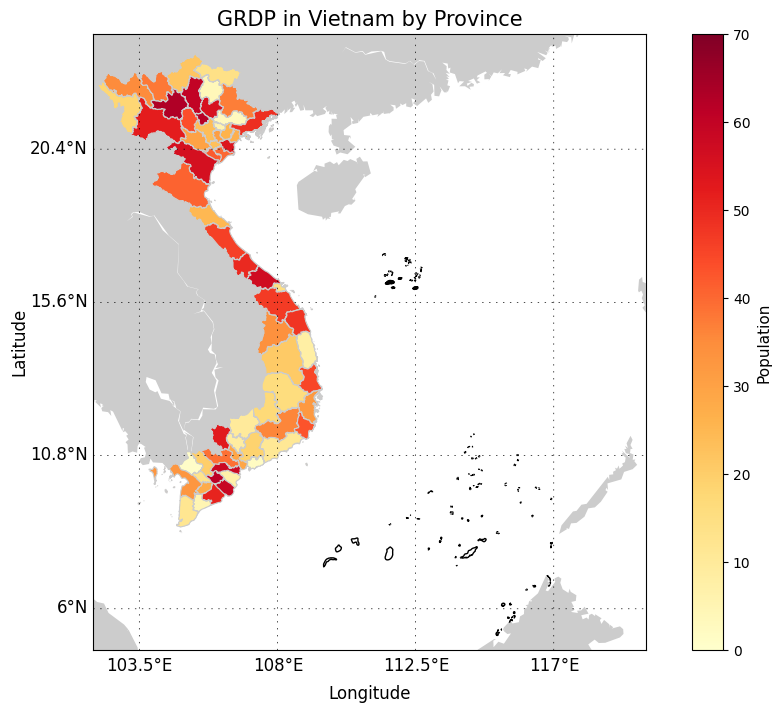

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

vietnam = gpd.read_file('gadm41_VNM_shp/gadm41_VNM_1.shp')

fig, ax = plt.subplots(1, figsize=(12, 8))

lon_min = 102
lon_max = 120
lat_min = 4.7
lat_max = 24


map2 = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min,
    urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='l',epsg=4326)


parallels = arange(-90.,150, around((lat_max-lat_min)/4, decimals=1))
meridians = arange(0.,180., around((lon_max-lon_min)/4, decimals=1))

map2.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=12, zorder=12) # left, right, top or bottom
map2.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=12, zorder=12)

map2.readshapefile('Islands/haidao', 'haidao',
    linewidth=1, color='k')


map2.fillcontinents()

vietnam.plot(column=population, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin = 0, vmax = 70)
cbar = ax.get_figure().get_axes()[1]
cbar.set_ylabel('Population', size=11)

ax.set_title('GRDP in Vietnam by Province', size=15)
ax.set_xlabel('Longitude', labelpad=25, size = 12)
ax.set_ylabel('Latitude', labelpad=47, size = 12)

plt.show()

## Exercise 2:
Problem 1: calculate mean value of points inside the shapefile for each province

Problem 2: plot it on map

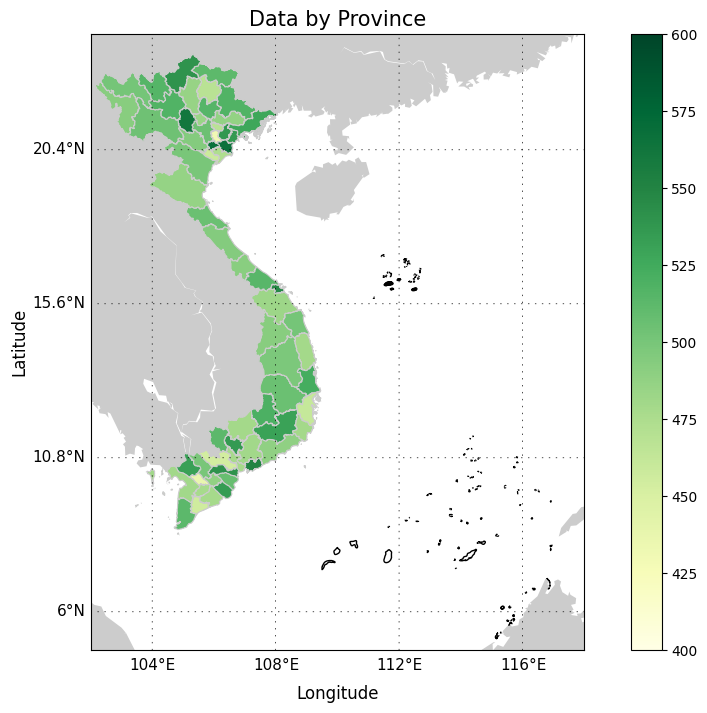

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

x_axis = arange(101, 110, 0.05)
y_axis = arange(8, 24, 0.05)

x_axis, y_axis = meshgrid(x_axis, y_axis)
random.seed(seed=180793)
data = random.randint(1, 1000, size = (size(x_axis,0), size(x_axis,1)))
x_axis = arange(101, 110, 0.05)
y_axis = arange(8, 24, 0.05)

poly_list = []
for shape in sf.shapes():
    poly = Polygon(shape.points)
    poly_list.append(poly)
bound_list = []
for i in range(len(sf.shapes())):
    bound = sf.shapes()[i].bbox
    bound_list.append(bound)

data_list = [[] for i in range(63)]
for i in range(len(poly_list)):
    for j in range(len(x_axis)):
        if x_axis[j] < bound_list[i][2] and x_axis[j] > bound_list[i][0]:
            for k in range(len(y_axis)):
                if y_axis[k] < bound_list[i][3] and y_axis[k] > bound_list[i][1]:
                    if poly_list[i].contains_point((x_axis[j], y_axis[k])):
                        data_list[i].append(data[k][j])
                elif y_axis[k] > bound_list[i][3]:
                    break
        elif x_axis[j] > bound_list[i][2]:
            break

data_by_province = []
for i in range(len(data_list)):
  mean_val = sum(data_list[i]) / len(data_list[i])
  data_by_province.append(mean_val)
data_by_province = array(data_by_province)



vietnam = gpd.read_file('gadm41_VNM_shp/gadm41_VNM_1.shp')

fig, ax = plt.subplots(1, figsize=(12, 8))

lon_min = 102
lon_max = 118
lat_min = 4.8
lat_max = 24


map2 = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min,
    urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='l',epsg=4326)


parallels = arange(-90.,150, around((lat_max-lat_min)/4, decimals=1))
meridians = arange(0.,180., around((lon_max-lon_min)/4, decimals=1))

map2.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=11, zorder=12) 
map2.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=11, zorder=12)

map2.readshapefile('Islands/haidao', 'haidao',
    linewidth=1, color='k')


map2.fillcontinents()

vietnam.plot(column=data_by_province, cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin = 400, vmax = 600)
cbar = ax.get_figure().get_axes()[1]

ax.set_title('Data by Province', fontsize=15)
ax.set_xlabel('Longitude', labelpad=25, size = 12)
ax.set_ylabel('Latitude', labelpad=45, size = 12)

plt.show()